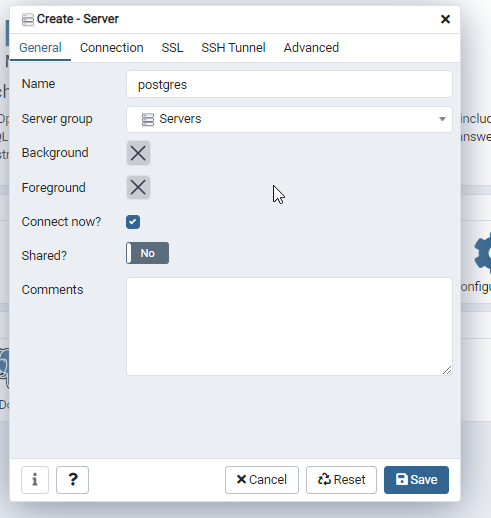

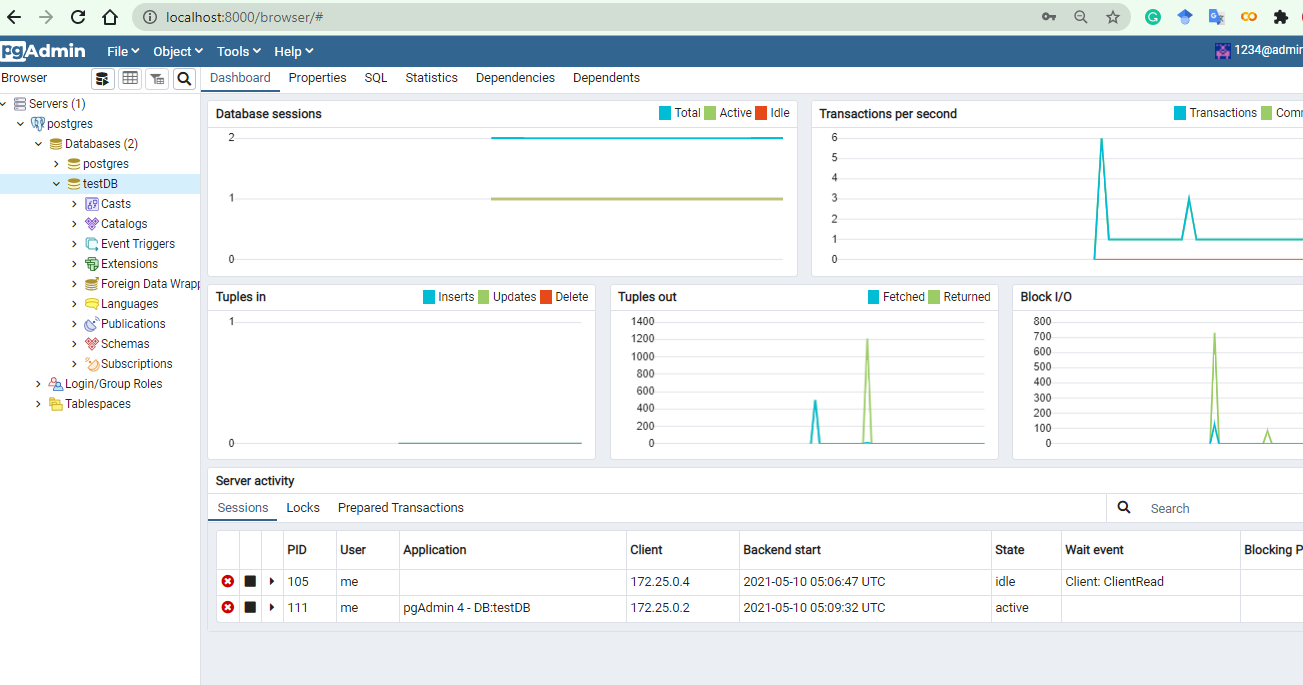

In [12]:
!pip install psycopg2-binary

In [1]:
try:
    from faker import Faker
except:
   !pip install faker 
   from faker import Faker
    
try:
    import psycopg2 
except:
    !pip install psycopg2-binary 
    import psycopg2
    
try:
    from sqlalchemy import create_engine
except:
    !pip install sqlalchemy
    from sqlalchemy import create_engine
    
    
try:
    import pandas as pd 
except:
    !pip install pandas
    import pandas as pd 
     

     |████████████████████████████████| 1.2 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 5.7 MB/s eta 0:00:01     |██████████████████████████████▋ | 2.8 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 2.9 MB/s eta 0:00:01    |██████████▍                     | 5.0 MB 6.7 MB/s eta 0:00:02


## Connection parameters:

- **database**: the name of the database that you want to connect.
- **user**: the username used to authenticate.
- **password**: password used to authenticate.
- **host**: database server address e.g., localhost or an IP address.
- **port**: the port number that defaults to 5432 if it is not provided

In [3]:
from sqlalchemy import create_engine
import psycopg2

host="postgres" # use "localhost" if you access from outside the localnet docker-compose env 
database="testDB"
user="me"
password="1234"
port='5432'
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
print(engine.table_names())

['table2', 'users2020']


<ipython-input-3-008683b43ae6>:10: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


## Create DataFrame from faker 

In [38]:
from faker import Faker
import csv
import pandas as pd 
output=open('data.csv','w')
fake=Faker()
header=['name','age','street','city','state','zip','lng','lat']
mywriter=csv.writer(output)
mywriter.writerow(header)
for r in range(1000000):
    row =[fake.name(),fake.random_int(min=18,max=80, step=1), 
                       fake.street_address(), fake.city(),fake.state(),
                       fake.zipcode(),fake.longitude(),fake.latitude()]
    mywriter.writerow(row)
output.close()
DF=pd.read_csv('data.csv')
DF.head(5)

name  age                     street            city  \
0   Michael Baker   58           187 Conway Field  Port Codyville   
1  Cameron Tucker   25  94349 Cooke Oval Apt. 011        Dawnview   
2   Michael Pratt   30          20220 Jerry Track     Hammondstad   
3   Tim Rodriguez   49      78984 Antonio Station      West Billy   
4      Seth James   56         76172 Moore Harbor   East Kimberly   

          state    zip         lng        lat  
0       Vermont  53597  -43.873889 -47.795873  
1        Alaska  36105   27.577841 -51.002918  
2     Wisconsin  54975  -73.615577   7.895882  
3    Washington  90977  154.298736  57.524039  
4  South Dakota  95832  -83.278297  65.753853

## Push the dataframe as table to the Postgresql DB

In [36]:
DF.to_sql('users2020', engine, if_exists='replace',index=False)

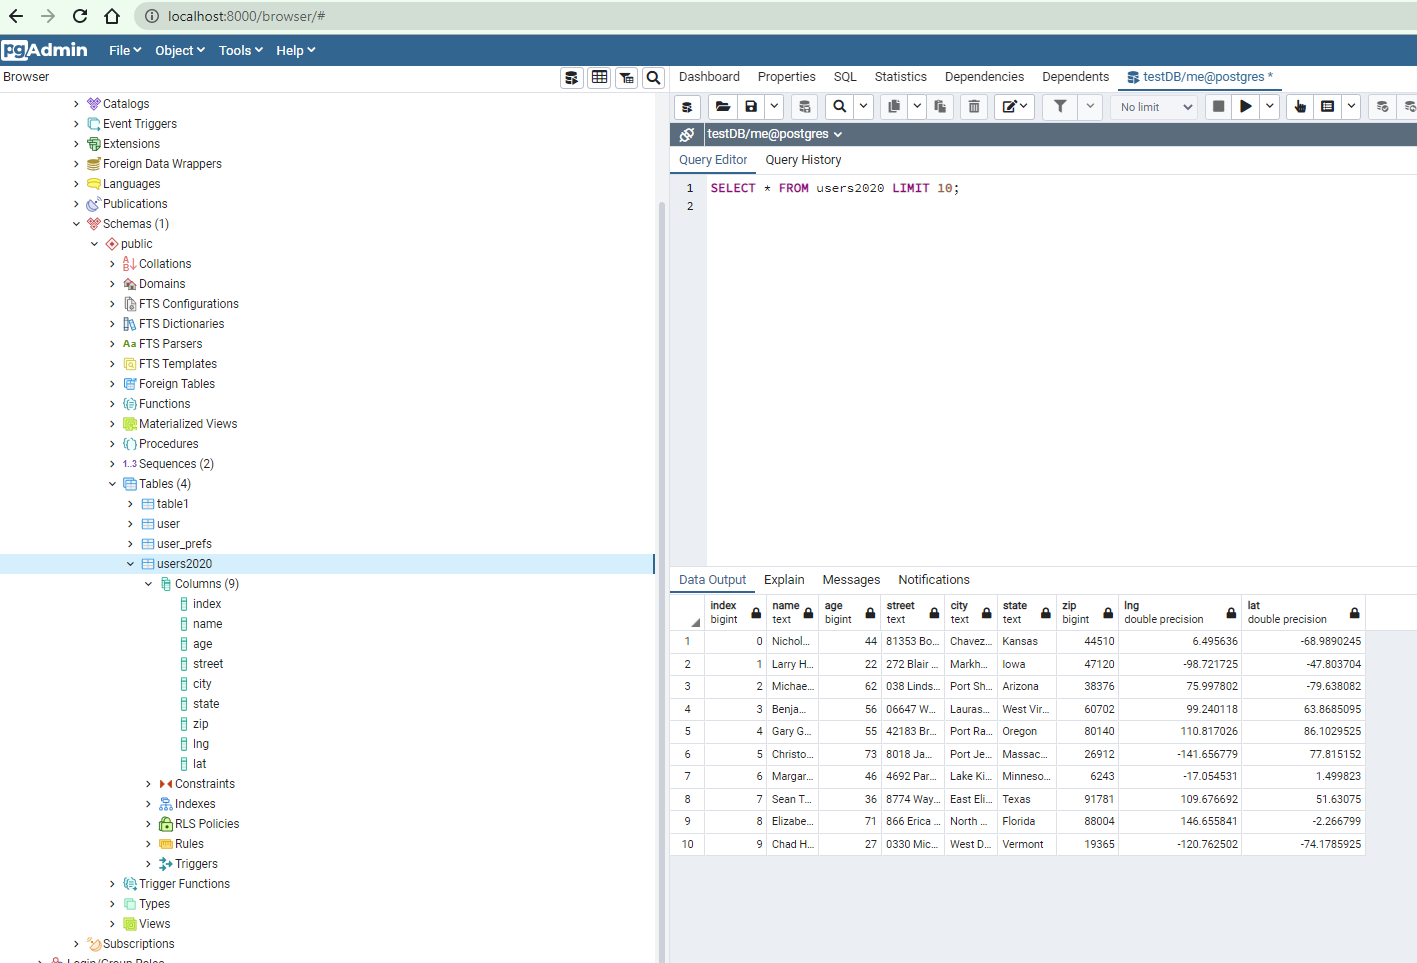

## Pull table from Postgresql DB

In [8]:
DF2=pd.read_sql("SELECT * FROM users2020" , engine);

In [9]:
DF2.head(5)

name  age                         street            city  \
0    William Patton   26             2554 Nicolas Parks  New Bryanburgh   
1      Michael Mora   78     0377 Nelson Ports Apt. 001   East Brittany   
2  Nathaniel Lucero   73  4144 Benjamin Ports Suite 556    Benjaminberg   
3      Anita Dawson   21              02159 Lewis Ville      Kellerberg   
4        Chad Baker   40   75296 Toni Parkways Apt. 133   Buchananburgh   

        state    zip         lng        lat  
0        Iowa  73233  177.806101  62.235756  
1      Kansas  43088 -138.898360 -18.928412  
2    New York  40317 -133.412813  71.462063  
3      Kansas  38596   37.456627  47.994779  
4  New Mexico  38638  142.004993 -21.790828

##  Transforming by adding new colum called sallary


In [10]:
import random 
DF2['salary']=DF2['age'].apply(lambda x:int(random.random()*10000) )

In [11]:
DF2.head(3)

name  age                         street            city  \
0    William Patton   26             2554 Nicolas Parks  New Bryanburgh   
1      Michael Mora   78     0377 Nelson Ports Apt. 001   East Brittany   
2  Nathaniel Lucero   73  4144 Benjamin Ports Suite 556    Benjaminberg   

      state    zip         lng        lat  salary  
0      Iowa  73233  177.806101  62.235756    7587  
1    Kansas  43088 -138.898360 -18.928412    2613  
2  New York  40317 -133.412813  71.462063    4725

##  Push the new DF2 as an updated table users2020

In [12]:
DF2.to_sql('users2020', engine,if_exists='replace',index=False)

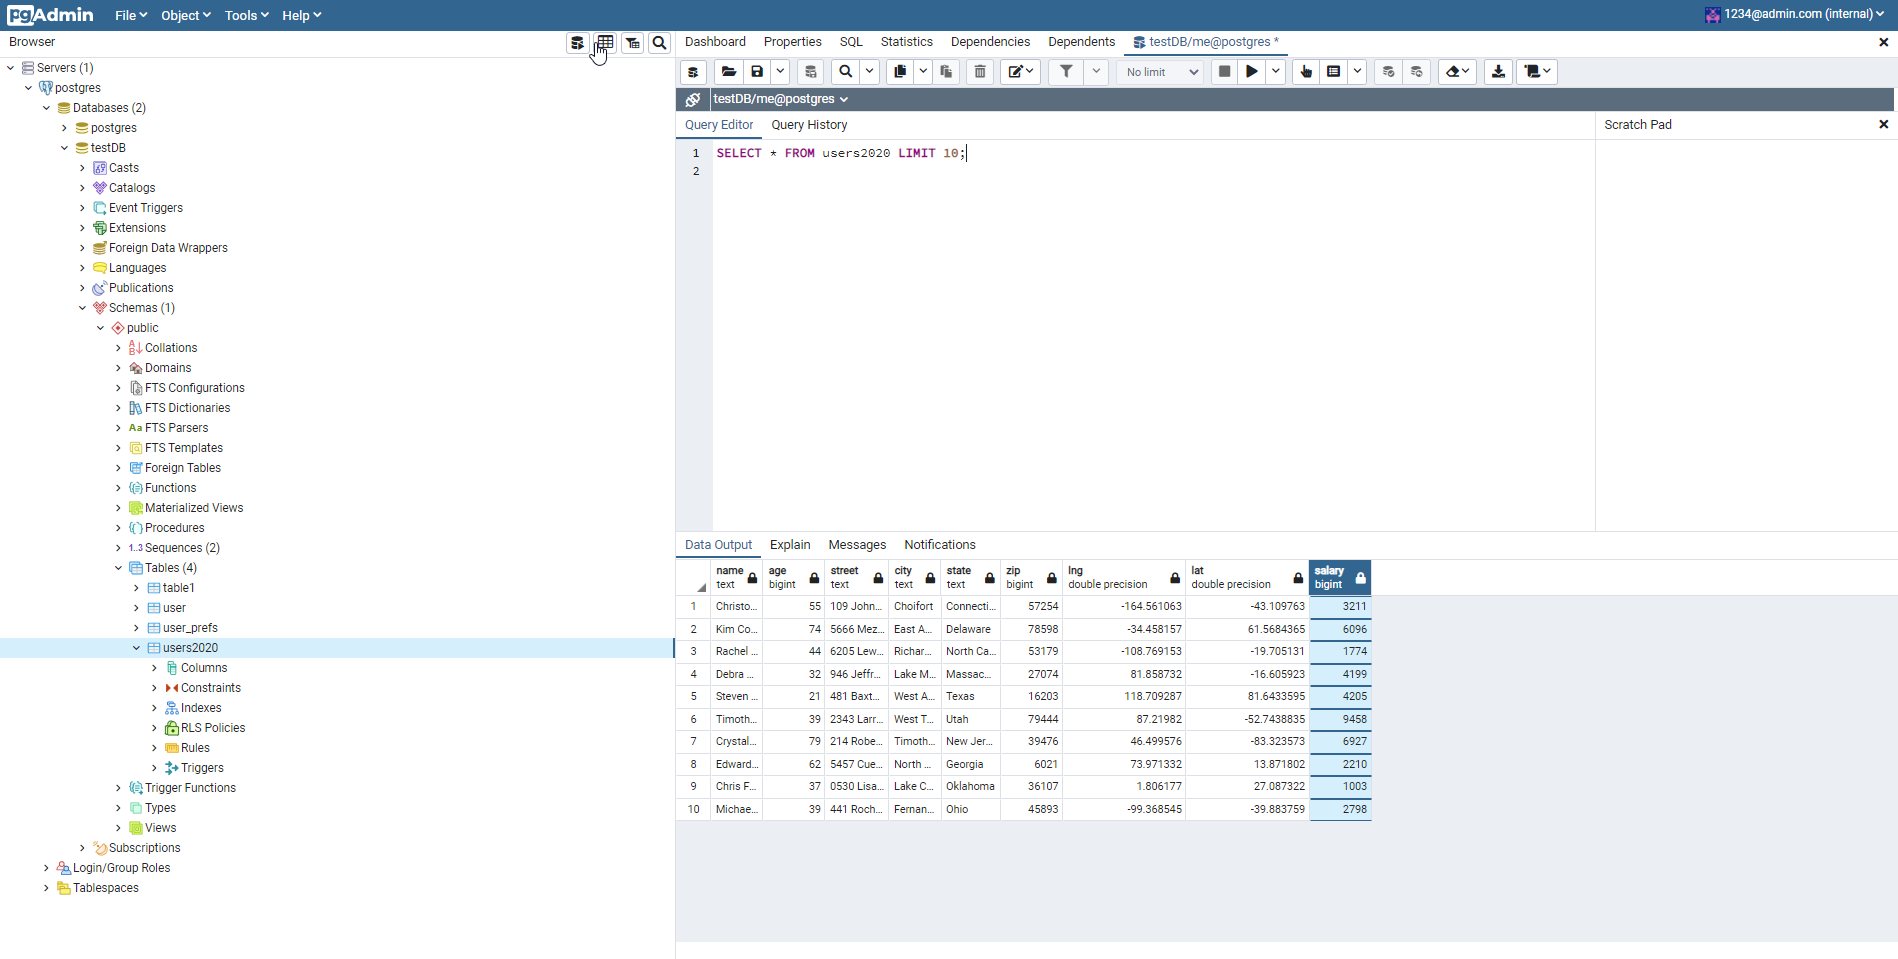

In [37]:
Count_records=pd.read_sql("SELECT COUNT(*) FROM users2020" , engine);
Count_records

count
0  10000

In [14]:
DF2.tail(5)

name  age                      street              city  \
995  Kayla Anderson   80          8150 Brown Orchard      Wallaceville   
996   Timothy Riley   65            274 Kelly Shoals        Wilsonland   
997   Walter Riddle   58  585 Alexis Point Suite 807  North Amandafort   
998     Nathan Pugh   34   53926 Kevin Dale Apt. 516      Robertsshire   
999   Michael Walsh   77      002 Lane Port Apt. 467    East Robertton   

            state    zip         lng        lat  salary  
995  South Dakota  70133  123.044032 -72.302561    4648  
996     Wisconsin  50743 -146.963418 -57.645226    1123  
997     Minnesota  38614   26.457547 -86.016674    6470  
998      Kentucky  80732 -173.494970  20.583037    4391  
999          Utah  45441 -124.829512 -51.418702     970

##  Create 100 rows DataFrame 

In [15]:
DF3=DF2.head(100)
DF3.index=range(len(DF2),len(DF2)+100)
DF3.head(10)

name  age                         street               city  \
1000    William Patton   26             2554 Nicolas Parks     New Bryanburgh   
1001      Michael Mora   78     0377 Nelson Ports Apt. 001      East Brittany   
1002  Nathaniel Lucero   73  4144 Benjamin Ports Suite 556       Benjaminberg   
1003      Anita Dawson   21              02159 Lewis Ville         Kellerberg   
1004        Chad Baker   40   75296 Toni Parkways Apt. 133      Buchananburgh   
1005       Seth Graham   53              024 Courtney Loop  North Matthewfurt   
1006   Danielle Wilson   22     3580 Kelli Skyway Apt. 595       Valerieshire   
1007  Kimberly Griffin   54     1156 Curtis Ford Suite 070         Susanmouth   
1008      Joseph Reyes   28    97959 Summers Park Apt. 396         Robertport   
1009    Jesse Marshall   71                 1314 Jose Fall       Lake Stephen   

           state    zip         lng        lat  salary  
1000        Iowa  73233  177.806101  62.235756    7587  
1001      Kansas  43088 -138.898360 -18.928412    2613  
1002    New York  40317 -133.412813  71.462063    4725  
1003      Kansas  38596   37.456627  47.994779    7996  
1004  New Mexico  38638  142.004993 -21.790828    2926  
1005    Missouri  73473   72.332325 -13.379499     385  
1006    Oklahoma  65777  169.313517   8.229926    2128  
1007    Missouri  77700  139.345511 -47.891233    6186  
1008    Delaware  21873    4.691910  63.264913    9973  
1009   Tennessee  55205 -174.752549 -48.858932     512

##  Append the new DF3 as an update to the table users2020

In [16]:
DF3.to_sql('users2020', engine, if_exists='append',index=False)

In [17]:
Count_records=pd.read_sql("SELECT COUNT(*) FROM users2020" , engine);
Count_records

count
0   1100

In [23]:
DF4=pd.read_sql("SELECT * FROM users2020 WHERE salary>3000" , engine);

In [24]:
DF4.head(3)

name  age                         street            city  \
0    William Patton   26             2554 Nicolas Parks  New Bryanburgh   
1  Nathaniel Lucero   73  4144 Benjamin Ports Suite 556    Benjaminberg   
2      Anita Dawson   21              02159 Lewis Ville      Kellerberg   

      state    zip         lng        lat  salary  
0      Iowa  73233  177.806101  62.235756    7587  
1  New York  40317 -133.412813  71.462063    4725  
2    Kansas  38596   37.456627  47.994779    7996

## Insert

In [21]:
D=engine.execute('SELECT * FROM users2020 LIMIT 10;')
for row in D:
    print(row)

('Ashley Moses', 54, '6050 Anderson Meadow Suite 282', 'New Tyler', 'Nevada', 2766, -151.4202, 59.0428565, 3836)
('Brenda Mcpherson', 24, '834 Maddox Lock Suite 950', 'Williamsfort', 'West Virginia', 85279, -113.26237, 77.3659975, 9617)
('Mr. David Kim', 73, '40051 Clayton Landing', 'South Annafurt', 'Kentucky', 63774, 151.240678, -58.421955, 6669)
('Theresa Jones', 28, '6819 Green Ranch', 'Port Erikatown', 'Michigan', 76131, -140.384076, 58.0060075, 399)
('Gary Huang', 42, '1198 Megan Shore Apt. 133', 'West David', 'Delaware', 64837, 9.876427, 19.0554885, 6124)
('Stephen Lam', 80, '9534 Tran Haven', 'Port Waynetown', 'Minnesota', 6468, 52.601621, -57.4670745, 3153)
('Randy Wagner', 65, '074 Jamie Corner Suite 731', 'Jessicamouth', 'Missouri', 50611, 129.283892, 41.310893, 8834)
('Eric Singh', 18, '3295 Brenda Plains', 'Manuelhaven', 'North Carolina', 95436, -34.13448, 57.289654, 8694)
('Steven Patterson', 41, '13838 Hensley Alley', 'East Kevinburgh', 'West Virginia', 17099, -151.96751

In [27]:
Query='''INSERT INTO users2020 (name, age, street, city, state, zip, lng, lat,salary)
VALUES ('Christopher Kirby', 55, '109 Johnson Fort', 'Choifort', 'Connecticut', 57254, -164.561063, -43.109763, 3211);'''
engine.execute(Query)

In [28]:
Query='SELECT COUNT(*) FROM users2020;'
D=pd.read_sql(Query,engine)
D

count
0   1102

In [29]:
D=engine.execute('SELECT COUNT(*) FROM users2020;')
list(D)[0][0]

1102

## Update

In [31]:

D=engine.execute('SELECT * FROM users2020 LIMIT 5;')
for row in D:
    print(row)

Query='''
UPDATE users2020
SET name = 'Alfred Schmidt', city= 'Frankfurt'
WHERE name = 'Chad Baker';
'''

engine.execute(Query)
print('-----------------------------------------------------------------------------------------')


D=engine.execute('SELECT * FROM users2020 LIMIT 5;')
for row in D:
    print(row)

('William Patton', 26, '2554 Nicolas Parks', 'New Bryanburgh', 'Iowa', 73233, 177.806101, 62.2357555, 7587)
('Michael Mora', 78, '0377 Nelson Ports Apt. 001', 'East Brittany', 'Kansas', 43088, -138.89836, -18.928412, 2613)
('Nathaniel Lucero', 73, '4144 Benjamin Ports Suite 556', 'Benjaminberg', 'New York', 40317, -133.412813, 71.4620635, 4725)
('Anita Dawson', 21, '02159 Lewis Ville', 'Kellerberg', 'Kansas', 38596, 37.456627, 47.9947795, 7996)
('Chad Baker', 40, '75296 Toni Parkways Apt. 133', 'Buchananburgh', 'New Mexico', 38638, 142.004993, -21.790828, 2926)
-----------------------------------------------------------------------------------------
('William Patton', 26, '2554 Nicolas Parks', 'New Bryanburgh', 'Iowa', 73233, 177.806101, 62.2357555, 7587)
('Michael Mora', 78, '0377 Nelson Ports Apt. 001', 'East Brittany', 'Kansas', 43088, -138.89836, -18.928412, 2613)
('Nathaniel Lucero', 73, '4144 Benjamin Ports Suite 556', 'Benjaminberg', 'New York', 40317, -133.412813, 71.4620635, 4

In [32]:
DF5=pd.read_sql("SELECT * FROM users2020" , engine);
DF5.tail(3)

name  age                        street       city  \
1099  Christopher Kirby   55              109 Johnson Fort   Choifort   
1100     Alfred Schmidt   40  75296 Toni Parkways Apt. 133  Frankfurt   
1101     Alfred Schmidt   40  75296 Toni Parkways Apt. 133  Frankfurt   

            state    zip         lng        lat  salary  
1099  Connecticut  57254 -164.561063 -43.109763    3211  
1100   New Mexico  38638  142.004993 -21.790828    2926  
1101   New Mexico  38638  142.004993 -21.790828    2926

## Delete

In [37]:
DF5.tail(3)

name  age               street           city    state    zip  \
997     Justin Paul   23   3170 Curry Village  East Omarfurt    Idaho   8029   
998    Megan Walker   62  54744 Anthony Mills    Dunnchester   Alaska  27757   
999  Alfred Schmidt   57      5732 Susan Path      Frankfurt  Vermont  93619   

            lng        lat  
997  123.513548 -77.780000  
998  -96.835536 -50.007179  
999  129.909784  12.805572

In [33]:

Query='''
DELETE FROM users2020
WHERE name = 'Alfred Schmidt';
'''

engine.execute(Query)

DF5=pd.read_sql("SELECT * FROM users2020" , engine);
DF5.tail(3)

name  age              street        city        state  \
1097      Sabrina White   61  42424 Olivia Shoal  North Todd     Missouri   
1098  Christopher Kirby   55    109 Johnson Fort    Choifort  Connecticut   
1099  Christopher Kirby   55    109 Johnson Fort    Choifort  Connecticut   

        zip         lng        lat  salary  
1097  58180 -123.836791 -54.739418    8808  
1098  57254 -164.561063 -43.109763    3211  
1099  57254 -164.561063 -43.109763    3211

In [34]:
Query='''
DELETE FROM users2020
WHERE name = 'Jack Johnson';
'''

engine.execute(Query)

DF5=pd.read_sql("SELECT * FROM users2020" , engine);
DF5.tail(10)

name  age                         street  \
1090        Megan Hartman   55               04164 Riggs Road   
1091           John Smith   36   6544 Knight Unions Suite 414   
1092  Mr. Preston Simmons   76    389 Jared Gardens Suite 632   
1093       Joseph Douglas   47            541 Annette Streets   
1094      Russell Higgins   38             97995 Heidi Square   
1095       Brenda Jimenez   40             478 Richard Groves   
1096    Jonathan Crawford   45  60923 Campos Springs Apt. 007   
1097        Sabrina White   61             42424 Olivia Shoal   
1098    Christopher Kirby   55               109 Johnson Fort   
1099    Christopher Kirby   55               109 Johnson Fort   

                 city        state    zip         lng        lat  salary  
1090     Rebeccamouth       Nevada  82277  -79.463019 -19.600939    8802  
1091       Carlosbury     Missouri  49400  104.324472 -62.760300    1862  
1092        Nancyside      Alabama  16080 -111.795880  -3.297675    6775  
1093    Christianstad    Tennessee  87637  -14.960765  35.235996    4228  
1094       West Bryan      Vermont   2833 -178.019526 -18.630940    9722  
1095  New Clintonstad  Connecticut  26944  -53.764838  12.757566    4904  
1096   New Davidmouth         Ohio  51910   66.470929   4.120684    3584  
1097       North Todd     Missouri  58180 -123.836791 -54.739418    8808  
1098         Choifort  Connecticut  57254 -164.561063 -43.109763    3211  
1099         Choifort  Connecticut  57254 -164.561063 -43.109763    3211